In [1]:
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable


In [2]:
glide_polar = {
    "velocity_kmh"  : [32,  36,   42,   46,  50],
    "sink_rate" : [ -1,   -1.05,  -1.4,  -1.75, -2.3]
}
glide_polar["velocity_ms"] = [vel/3.6 for vel in glide_polar["velocity_kmh"]]
glide_polar["glide_ratio"] = [abs(v/s) for v, s in zip(glide_polar["velocity_ms"], glide_polar["sink_rate"])]

def velocity_idx_to_speedbar(index):
    if index == 0:
        return "Min Sink"
    elif index == 1:
        return "Trim"
    elif index == 2:
        return "1/3 Bar"
    elif index == 3:
        return "2/3 Bar"
    elif index == 4:
        return "Full Bar"
    else:
        return "Invalid Index"

Text(0.5, 1.0, 'Estimated Polar for High B Wing')

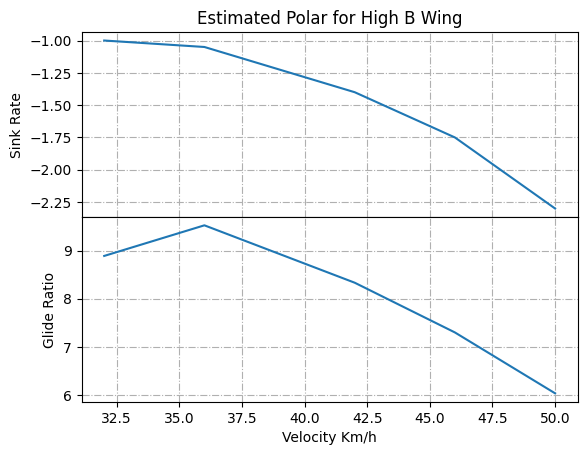

In [3]:
fig = plt.figure()
gs = fig.add_gridspec(2, hspace=0)
ax_top, ax_bottom = gs.subplots(sharex=True)

ax_top.plot(glide_polar["velocity_kmh"], glide_polar["sink_rate"])
ax_top.set_ylabel("Sink Rate")
ax_bottom.plot(glide_polar["velocity_kmh"], glide_polar["glide_ratio"])
ax_bottom.set_ylabel("Glide Ratio")
ax_bottom.set_xlabel("Velocity Km/h")
ax_top.grid(True, linestyle='-.')
ax_bottom.grid(True, linestyle='-.')

ax_top.set_title("Estimated Polar for High B Wing")

In [4]:
def total_time(distance_m, thermal_strength_ms, velocity_ms, sink_rate, headwind_ms = 0):
    return ((distance_m/(velocity_ms-headwind_ms))*(1-sink_rate/thermal_strength_ms))

In [5]:
def calc_speed_to_fly(thermal_strengths, wind_speeds):
    time_to_fly_thermals = {}
    for thermal_strength in thermal_strengths:
        time_to_fly_thermals[thermal_strength] = {}
        for wind_speed in wind_speeds:
            time_to_fly_thermals[thermal_strength][wind_speed] = {"velocity_ms" : [], "time_to_fly" : [], "speed_to_fly": ""}
            for (velocity_ms, sink_rate) in zip(glide_polar["velocity_ms"], glide_polar["sink_rate"]):
                time_to_fly = total_time(1000, thermal_strength, velocity_ms, sink_rate, wind_speed)
                time_to_fly_thermals[thermal_strength][wind_speed]["velocity_ms"].append(velocity_ms)
                time_to_fly_thermals[thermal_strength][wind_speed]["time_to_fly"].append(time_to_fly)
            time_to_fly_thermals[thermal_strength][wind_speed]["speed_to_fly"] = np.argmin(time_to_fly_thermals[thermal_strength][wind_speed]["time_to_fly"])

    return time_to_fly_thermals

In [6]:
thermals = [0.5, 1, 2, 3, 4]
wind_speeds_ms = [v/3.6 for v in range(-10, 25, 5)]
tft = calc_speed_to_fly(thermals, wind_speeds_ms)

header_row = ["Wind Speed (kmh)"]
header_row += [f"MacCready {t}" for t in thermals]
t = PrettyTable(header_row)
for wind_speed in wind_speeds_ms:
    row = [int(wind_speed * 3.6)]
    for thermal_strength in thermals:
        row.append(velocity_idx_to_speedbar(tft[thermal_strength][wind_speed]["speed_to_fly"]))
    t.add_row(row)
print(t)


+------------------+---------------+-------------+-------------+-------------+-------------+
| Wind Speed (kmh) | MacCready 0.5 | MacCready 1 | MacCready 2 | MacCready 3 | MacCready 4 |
+------------------+---------------+-------------+-------------+-------------+-------------+
|       -10        |      Trim     |     Trim    |   1/3 Bar   |   1/3 Bar   |   2/3 Bar   |
|        -5        |      Trim     |     Trim    |   1/3 Bar   |   2/3 Bar   |   2/3 Bar   |
|        0         |      Trim     |     Trim    |   1/3 Bar   |   2/3 Bar   |   2/3 Bar   |
|        5         |      Trim     |   1/3 Bar   |   2/3 Bar   |   2/3 Bar   |   Full Bar  |
|        10        |    1/3 Bar    |   1/3 Bar   |   2/3 Bar   |   2/3 Bar   |   Full Bar  |
|        15        |    1/3 Bar    |   2/3 Bar   |   2/3 Bar   |   Full Bar  |   Full Bar  |
|        20        |    1/3 Bar    |   2/3 Bar   |   Full Bar  |   Full Bar  |   Full Bar  |
+------------------+---------------+-------------+-------------+------

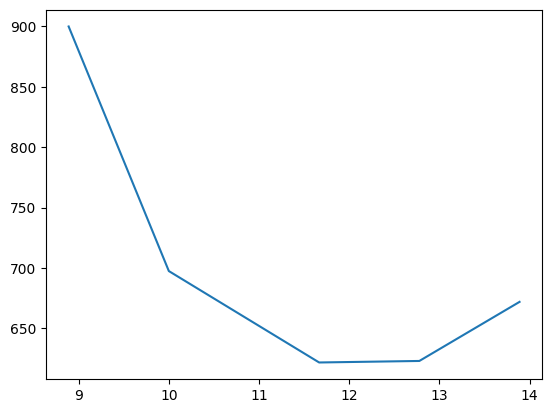

In [7]:
plt.plot(tft[0.5][20/3.6]["velocity_ms"], tft[0.5][20/3.6]["time_to_fly"])